In [0]:
#!git clone https://github.com/theschoolofai/YoloV3.git

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My \Drive/EVA4/S13B

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/EVA4/S13B


In [4]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [5]:
ls

cfg/       out_out/      runs/             utils/
data/      out_video/    test_batch0.png   weights/
detect.py  __pycache__/  test.py           YoloV3_Annotation_Tool-master/
in_video/  results.png   train_batch0.png
models.py  results.txt   train.py


In [6]:
!ls

cfg	   out_out	runs		  utils
data	   out_video	test_batch0.png   weights
detect.py  __pycache__	test.py		  YoloV3_Annotation_Tool-master
in_video   results.png	train_batch0.png
models.py  results.txt	train.py


In [7]:
!ls data/customdata

custom.data  custom.names  custom.shapes  custom.txt  images  labels


In [8]:
!python train.py --data data/customdata/custom.data --batch 3 --cache --epochs 3 --nosave


Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/customdata/custom.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-04-25 07:47:35.452191: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (500 found, 0 missing, 0 empty, 0 duplicate, for 500 images): 100% 500/500 [03:53<00:00,  2.14it/s]
Caching images (0.3GB): 100% 500/500 [03:57<00:00,  2.11it/s]
Caching labels (500 found, 0 missing, 0 empty, 0 duplicate, for 500 images): 100% 500/500 [00:00<00:00, 863.

In [9]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-04-25 08:00:10.777121: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (500 found, 0 missing, 0 empty, 0 duplicate, for 500 images): 100% 500/500 [00:00<00:00, 997.05it/s] 
Caching images (0.3GB): 100% 500/500 [00:02<00:00, 182.21it/s]
Caching labels (500 found, 0 missing, 0 empty, 0 duplicate, for 500 images): 100% 500/500 [00:00<00

In [10]:
!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/500 data/customdata/images/img_001.jpg: 384x512 1 Alexs, Done. (0.039s)
image 2/500 data/customdata/images/img_002.jpg: 448x512 1 Alexs, Done. (0.043s)
image 3/500 data/customdata/images/img_003.jpg: 448x512 2 Alexs, Done. (0.031s)
image 4/500 data/customdata/images/img_004.jpg: 448x512 1 Alexs, Done. (0.031s)
image 5/500 data/customdata/images/img_005.jpg: 448x512 2 Alexs, Done. (0.032s)
image 6/500 data/customdata/images/img_006.jpg: 448x512 1 Alexs, Done. (0.027s)
image 7/500 data/customdata/images/img_007.jpg:

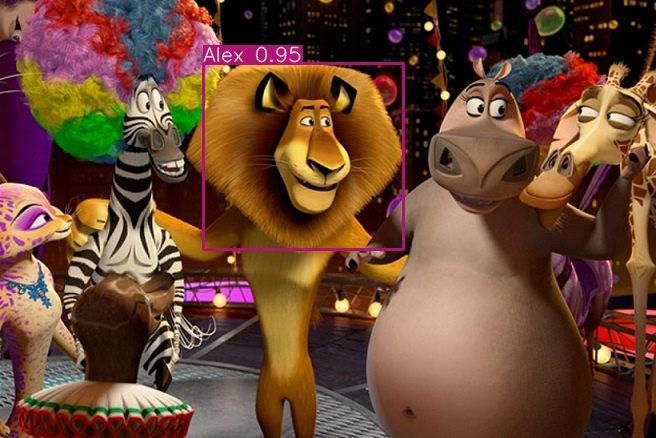

In [11]:
Image(filename='out_out/img_001.jpg', width=600)

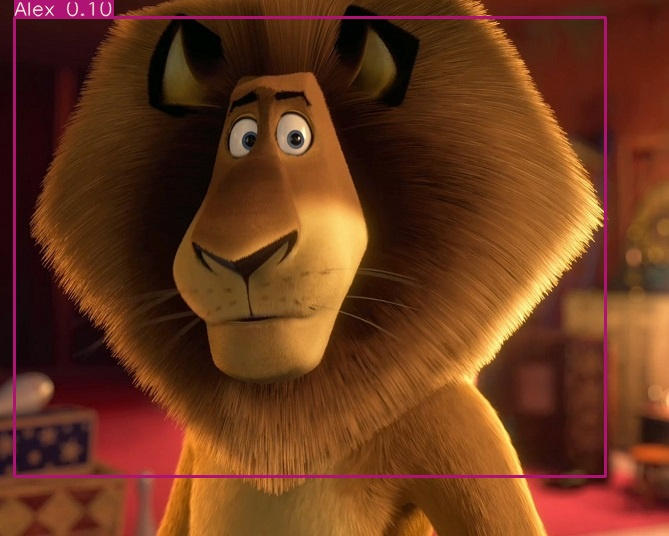

In [12]:
Image(filename='out_out/img_002.jpg', width=600)

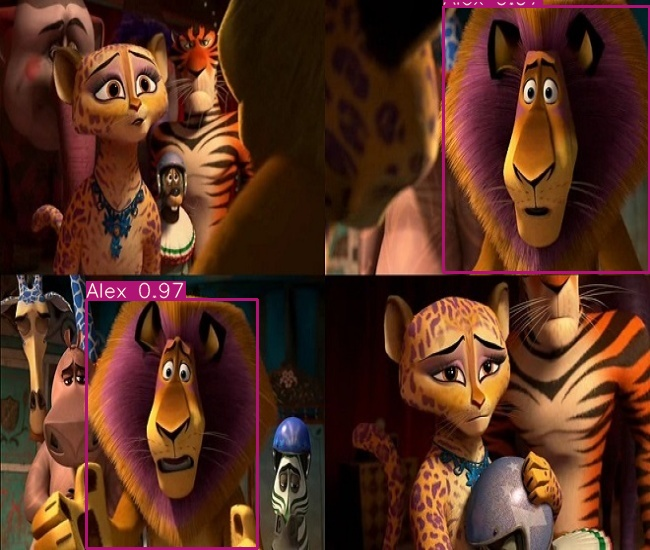

In [13]:
Image(filename='out_out/img_003.jpg', width=600)

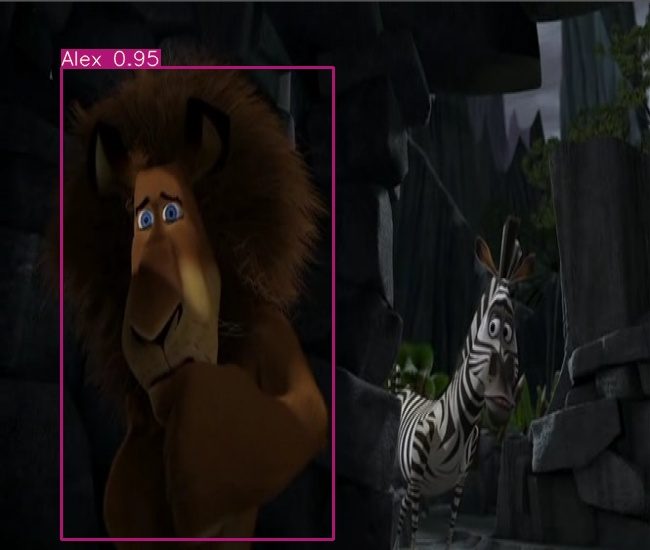

In [14]:
Image(filename='out_out/img_020.jpg', width=600)

In [15]:
!python detect.py --conf -thres 0.1 --output "/content/gdrive/My \Drive/EVA4/S13B/out_video" --source "/content/gdrive/My \Drive/EVA4/S13B/in_video/Madagascar.mp4"

usage: detect.py [-h] [--cfg CFG] [--names NAMES] [--weights WEIGHTS]
                 [--source SOURCE] [--output OUTPUT] [--img-size IMG_SIZE]
                 [--conf-thres CONF_THRES] [--iou-thres IOU_THRES]
                 [--fourcc FOURCC] [--half] [--device DEVICE] [--view-img]
                 [--save-txt] [--classes CLASSES [CLASSES ...]]
                 [--agnostic-nms] [--augment]
detect.py: error: argument --conf-thres: expected one argument
